In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import pylab as pl

In [3]:
df = pd.read_csv('data/insurance_data.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


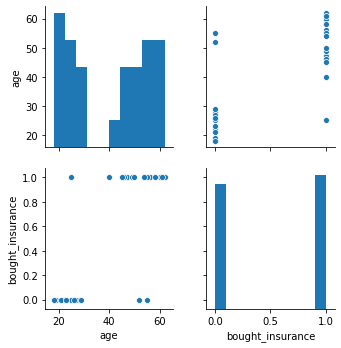

In [4]:
sn.pairplot(df)

Text(0.5, 1.0, 'Based on the age wether a person gets as insurance or not')

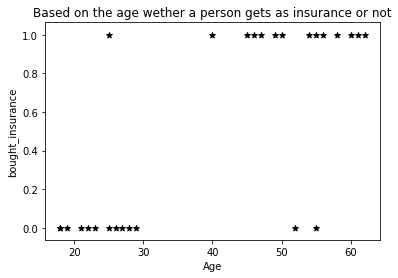

In [5]:
plt.scatter(df.age, df.bought_insurance, marker = '*', color = 'k')
plt.xlabel('Age')
plt.ylabel('bought_insurance')
plt.title('Based on the age wether a person gets as insurance or not')

In [6]:
x = df[['age']]
x.head()

,age
0,22
1,25
2,47
3,52
4,46


In [7]:
y = df['bought_insurance']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: bought_insurance, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)

In [9]:
x_train.shape

(21, 1)

In [10]:
x_test.shape

(6, 1)

In [11]:
y_train.shape

(21,)

In [12]:
y_test.shape

(6,)

In [13]:
from sklearn.linear_model import LogisticRegression
regr = LogisticRegression(solver = 'lbfgs', max_iter = 1000, C = 0.01)
regr.fit(x_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
y_test

7     1
6     0
26    0
12    0
19    0
15    1
Name: bought_insurance, dtype: int64

In [15]:
y_pred = regr.predict(x_test)
y_pred

array([1, 1, 0, 0, 0, 1], dtype=int64)

In [16]:
y_pred_proba = regr.predict_proba(x_test)
y_pred_proba

array([[0.04600205, 0.95399795],
       [0.0824666 , 0.9175334 ],
       [0.82861678, 0.17138322],
       [0.74606071, 0.25393929],
       [0.90011793, 0.09988207],
       [0.0824666 , 0.9175334 ]])

In [17]:
a_1 = regr.score(x_train, y_train)
a_1

0.9047619047619048

In [18]:
a_2 = regr.score(x_test, y_test)
a_2

0.8333333333333334

In [19]:
a_3 = regr.score(x_test, y_pred)
a_3

1.0

In [20]:
from sklearn.metrics import jaccard_similarity_score, classification_report, confusion_matrix
a_4 = jaccard_similarity_score(y_test, y_pred)
a_4

c:\users\raghavendra\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.8333333333333334

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_pred, labels=[1,0]))

[[2 0]
 [1 3]]


Confusion matrix, without normalization
[[2 0]
 [1 3]]


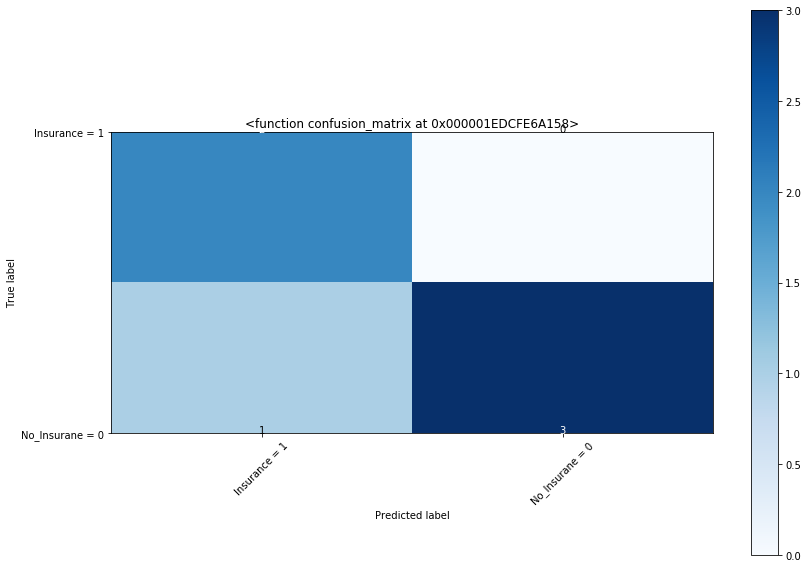

In [22]:
cnf_matrix = confusion_matrix(y_test, y_pred, labels = [1, 0])
np.set_printoptions(precision = 2)
plt.figure(figsize = (12, 8))
plot_confusion_matrix(cnf_matrix, classes = ['Insurance = 1', 'No_Insurane = 0'], normalize = False, title = confusion_matrix)

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.67      1.00      0.80         2

    accuracy                           0.83         6
   macro avg       0.83      0.88      0.83         6
weighted avg       0.89      0.83      0.84         6



In [24]:
from sklearn.metrics import accuracy_score
a_5 = accuracy_score(y_test, y_pred)
a_5

0.8333333333333334

In [25]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [26]:
y_test

7     1
6     0
26    0
12    0
19    0
15    1
Name: bought_insurance, dtype: int64

In [27]:
y_pred_1 = knn.predict(x_test)
y_pred_1

array([1, 1, 0, 0, 0, 1], dtype=int64)

In [28]:
y_pred_1_proba = knn.predict_proba(x_test)
y_pred_1_proba

array([[0. , 1. ],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.2, 0.8]])

In [29]:
b_1 = knn.score(x_train, y_train)
b_1

0.9047619047619048

In [30]:
b_2 = knn.score(x_test, y_test)
b_2

0.8333333333333334

In [31]:
b_3 = knn.score(x_test, y_pred_1)
b_3

1.0

In [32]:
b_4 = jaccard_similarity_score(y_test, y_pred_1)
b_4

c:\users\raghavendra\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.8333333333333334

In [33]:
b_5 = accuracy_score(y_test, y_pred_1)

In [46]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [49]:
y_test

7     1
6     0
26    0
12    0
19    0
15    1
Name: bought_insurance, dtype: int64

In [52]:
yhat = clf.predict(x_test)
yhat

array([1, 1, 0, 0, 0, 1], dtype=int64)

In [50]:
c_1 = clf.score(x_train, y_train)
c_1

0.9523809523809523

In [51]:
c_2 = clf.score(x_test, y_test)
c_2

0.8333333333333334

In [54]:
c_3 = clf.score(x_test, yhat)
c_3

1.0

In [55]:
c_4 = jaccard_similarity_score(y_test, yhat)
c_4

c:\users\raghavendra\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.8333333333333334

In [56]:
c_5 = accuracy_score(y_test, yhat)
c_5

0.8333333333333334

In [119]:
from sklearn import svm
clf_1 = svm.SVC(kernel = 'sigmoid', gamma = 'auto')
clf_1.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [120]:
y_test

7     1
6     0
26    0
12    0
19    0
15    1
Name: bought_insurance, dtype: int64

In [121]:
yhat_1 = clf_1.predict(x_test)
yhat_1

array([1, 1, 1, 1, 1, 1], dtype=int64)

In [122]:
d_1 = clf_1.score(x_train, y_train)
d_1

0.5714285714285714

In [123]:
d_2 = clf_1.score(x_test, y_pred)
d_2

0.5

In [124]:
d_3 = clf_1.score(x_test, yhat_1)
d_3

1.0

In [125]:
d_4 = jaccard_similarity_score(y_test, yhat_1)
d_4

c:\users\raghavendra\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.3333333333333333

In [126]:
d_5 = accuracy_score(y_test, yhat_1)
d_5

0.3333333333333333

In [127]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [69]:
y_test

7     1
6     0
26    0
12    0
19    0
15    1
Name: bought_insurance, dtype: int64

In [70]:
ypred_2 = rf.predict(x_test)
ypred_2

array([1, 1, 0, 0, 0, 1], dtype=int64)

In [71]:
e_1 = rf.score(x_train, y_train)
e_1

0.9523809523809523

In [72]:
e_2 = rf.score(x_test, y_test)
e_2

0.8333333333333334

In [73]:
e_3 = rf.score(x_test, ypred_2)
e_3

1.0

In [75]:
e_4 = jaccard_similarity_score(y_test, ypred_2)
e_4

c:\users\raghavendra\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.8333333333333334

In [76]:
e_5 = accuracy_score(y_test, ypred_2)
e_5

0.8333333333333334

In [77]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gsn = GaussianNB()
gsn.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [90]:
yhat_2 = gsn.predict(x_test)
yhat_2

array([1, 1, 0, 0, 0, 1], dtype=int64)

In [91]:
f_1 = gsn.score(x_train, y_train)
f_1

0.9047619047619048

In [92]:
f_2 = gsn.score(x_test, y_test)
f_2

0.8333333333333334

In [93]:
f_3 = gsn.score(x_test, yhat_2)
f_3

1.0

In [94]:
f_4 = jaccard_similarity_score(y_test, yhat_2)
f_4

c:\users\raghavendra\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.8333333333333334

In [95]:
f_5 = accuracy_score(y_test, yhat_2)
f_5

0.8333333333333334

In [84]:
mul = MultinomialNB()
mul.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [97]:
y_test

7     1
6     0
26    0
12    0
19    0
15    1
Name: bought_insurance, dtype: int64

In [96]:
ypred_3 = mul.predict(x_test)
ypred_3

array([0, 0, 0, 0, 0, 0], dtype=int64)

In [88]:
g_1 = mul.score(x_train, y_train)
g_1

0.42857142857142855

In [89]:
g_2 = mul.score(x_test, y_test)
g_2

0.6666666666666666

In [99]:
g_3 = mul.score(x_test, ypred_3)
g_3

1.0

In [101]:
g_4 = jaccard_similarity_score(y_test, ypred_3)
g_4

c:\users\raghavendra\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.6666666666666666

In [102]:
g_5 = accuracy_score(y_test, ypred_3)
g_5

0.6666666666666666

In [103]:
ber = BernoulliNB()
ber.fit(x_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [106]:
y_test

7     1
6     0
26    0
12    0
19    0
15    1
Name: bought_insurance, dtype: int64

In [107]:
yhat_3 = ber.predict(x_test)
yhat_3

array([1, 1, 1, 1, 1, 1], dtype=int64)

In [108]:
h_1 = ber.score(x_train, y_train)
h_1

0.5714285714285714

In [109]:
h_2 = ber.score(x_test, y_test)
h_2

0.3333333333333333

In [113]:
h_4 = jaccard_similarity_score(y_test, yhat_3)
h_4

c:\users\raghavendra\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.3333333333333333

In [115]:
h_5 = accuracy_score(y_test, yhat_3)
h_5

0.3333333333333333

In [116]:
h_3 = ber.score(x_test, yhat_3)
h_3

1.0

In [118]:
DF = pd.DataFrame({'Training_Score' : [a_1, b_1, c_1, d_1, e_1, f_1, g_1, h_1],
                  'Testing Score' : [a_2, b_2, c_2, d_2, e_2, f_2, g_2, h_2],
                  'Predicted Score' : [a_3, b_3, c_3, d_3, e_3, f_3, g_3, h_3],
                  'Jaccard_Similarity_score' : [a_4, b_4, c_4, d_4, e_4, f_4, g_4, h_4],
                  'Accuracy Score' : [a_5, b_5, c_5, d_5, e_5, f_5, g_5, h_5]}, index = ['Logistic', 'KNN', 'Decision Tree', 'SVM', 'Random Forest', 'GaussianNB', 'MultinomialNB', 'BernoulliNB'])
DF

,Training_Score,Testing Score,Predicted Score,Jaccard_Similarity_score,Accuracy Score
Logistic,0.952381,0.833333,1.0,0.833333,0.833333
KNN,0.904762,0.833333,1.0,0.833333,0.833333
Decision Tree,0.952381,0.833333,1.0,0.833333,0.833333
SVM,0.952381,1.000000,1.0,0.833333,0.833333
Random Forest,0.952381,0.833333,1.0,0.833333,0.833333
GaussianNB,0.904762,0.833333,1.0,0.833333,0.833333
MultinomialNB,0.428571,0.666667,1.0,0.666667,0.666667
BernoulliNB,0.571429,0.333333,1.0,0.333333,0.333333
